** 英語のテキスト（nlp.txt）に対して，以下の処理を実行せよ． **

** coreNLP **

*** How to run corenlp from python ***

In [1]:
import os

In [2]:
corenlp_path = os.path.expanduser("~") + "/Tools/stanford-corenlp-full-2018-02-27/*" 

In [ ]:
subprocess_command = 'java -Xmx4g -cp ' + '"' + corenlp_path + '"'  + '  edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -file nlp100data/nlp.txt'

In [7]:
import subprocess

In [8]:
import codecs

In [ ]:
subprocess.run(subprocess_command , 
              shell = True, 
              check = True)

**** sandbox (failed attempts) ****

In [22]:
homedir = os.getenv('HOME')

bash上でcoreNLPのディレクトリに移動して以下のコマンドはうまくいった。

もっともcoreNLPのディレクトリ以下に吐いてしまう

:~/Tools/stanford-corenlp-full-2018-02-27$ java -cp "*" -Xmx2g edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,tokenize,pos,lemma,ner -file ~/PycharmProjects/keras_sandbox/nlp100data/nlp.txt


以下も動きそうで動かない（？）

In [ ]:
%%bash
cd ~/Tools/stanford-corenlp-full-2018-02-27/
java -cp "*" -Xmx2g edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -file /home/toshinao/PycharmProjects/keras_sandbox/nlp100data/nlp.txt 

*** formatting xml ***


In [ ]:
%%bash
xmllint --format nlp.txt.xml --output tmp.xml


*** server ***

起動の仕方は：

https://stanfordnlp.github.io/CoreNLP/corenlp-server.html



In [ ]:
%%bash
pwd

In [ ]:
%%bash
cd ~/Tools/stanford-corenlp-full-2018-02-27/
java -Xmx2g  -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -file input.txt

*** python binding (以下では使わない)***



https://www.khalidalnajjar.com/setup-use-stanford-corenlp-server-python/
に従って、

https://github.com/Lynten/stanford-corenlp
を試してみる

In [ ]:
from stanfordcorenlp import StanfordCoreNLP

以下のようにすれば予めサーバを立てておかなくても良い：

In [ ]:
corenlp = StanfordCoreNLP(r'/home/toshinao/Tools/stanford-corenlp-full-2018-02-27')

In [ ]:
corenlp.parse(r'nlp100data/nlp.txt')

In [ ]:
sentence = 'Guangdong University of Foreign Studies is located in Guangzhou.'

In [ ]:
print(corenlp.word_tokenize(sentence))

In [ ]:
print(corenlp.pos_tag(sentence))

In [ ]:
print(corenlp.ner(sentence))

In [ ]:
print(nlp.parse(sentence))

In [ ]:
print(corenlp.dependency_parse(sentence))

** 0. 文区切り **

(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

In [3]:
import codecs

In [4]:
import re

In [5]:
nlp_txt_path = 'nlp100data/nlp.txt'

In [6]:
def nlp_lines(file_path):
    r = re.compile("(^.*?[\.|;|:|\?|!])\s([A-Z].*)")
    with codecs.open(file_path , 'r', 'utf-8') as rf:
        for l in rf:
            l = l.strip()
            while len(l) > 0:
                m = r.match(l)
                if m:
                    s0 = m.group(1)
                    l = m.group(2)
                    yield s0
                else:
                    yield l
                    l = ""
            

In [7]:
for i, l in enumerate(nlp_lines(nlp_txt_path)):
    if i < 10:
        print(l)

Natural language processing
From Wikipedia, the free encyclopedia
Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.
As such, NLP is related to the area of humani-computer interaction.
Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.
History
The history of NLP generally starts in the 1950s, although work can be found from earlier periods.
In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.
The authors claimed that within three or five years, machine translation would be a 

*** sandbox ***

In [8]:
r = re.compile("(^.*?[\.|;|:|\?|!])\s([A-Z].*)")

In [9]:
m = r.match(run_list[3])

NameError: name 'run_list' is not defined

In [10]:
m.group(2)

NameError: name 'm' is not defined

In [11]:
with codecs.open(nlp_txt_path , 'r' , 'utf-8') as rf:
    for i , l in enumerate(rf):
        if i < 100:
            print(l)

Natural language processing

From Wikipedia, the free encyclopedia



Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.



History



The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.



The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translatio

In [18]:
run_list = []
with codecs.open(nlp_txt_path, 'r' , 'utf-8') as rf:
    for l in rf:
        run_list.append(l)

In [19]:
run_list[3]

'Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.\n'

In [20]:
%%bash
git commit -a -m "from notebook"

[master 8096455] from notebook
 2 files changed, 516 insertions(+), 24 deletions(-)


#### 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [21]:
def nlp_words(nlp_txt_path):
    for l in nlp_lines(nlp_txt_path):
        for x in l.split(" "):
            yield x.rstrip('.,;:?!')
        yield ''

別解

In [10]:
def nlp_words(nlp_txt_path):
    r = re.compile('[\.|;|:|?|\!]')
    for l in nlp_lines(nlp_txt_path):
        for x in l.split(' '):
            yield r.sub("" , x)
        yield ''

In [22]:
for i , w in enumerate(nlp_words(nlp_txt_path)):
    if i < 10:
        print(w)

Natural
language
processing

From
Wikipedia
the
free
encyclopedia



##### sandbox


In [6]:
for l in nlp_lines(nlp_txt_path):
    for x in l.split(" "):
        print(x)
    print('')

IndentationError: unexpected indent (<ipython-input-6-d49f05252ab6>, line 3)

#### ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装としてstemmingモジュールを利用するとよい．

In [23]:
import re

In [24]:
import snowballstemmer

In [25]:
stemmer = snowballstemmer.stemmer('english')

In [26]:
for i , w in enumerate(nlp_words(nlp_txt_path)):
    if i <100:
        print('{}\t{}'.format(w , stemmer.stemWord(w)))

Natural	Natur
language	languag
processing	process
	
From	From
Wikipedia	Wikipedia
the	the
free	free
encyclopedia	encyclopedia
	
Natural	Natur
language	languag
processing	process
(NLP)	(NLP)
is	is
a	a
field	field
of	of
computer	comput
science	scienc
artificial	artifici
intelligence	intellig
and	and
linguistics	linguist
concerned	concern
with	with
the	the
interactions	interact
between	between
computers	comput
and	and
human	human
(natural)	(natural)
languages	languag
	
As	As
such	such
NLP	NLP
is	is
related	relat
to	to
the	the
area	area
of	of
humani-computer	humani-comput
interaction	interact
	
Many	Mani
challenges	challeng
in	in
NLP	NLP
involve	involv
natural	natur
language	languag
understanding	understand
that	that
is	is
enabling	enabl
computers	comput
to	to
derive	deriv
meaning	mean
from	from
human	human
or	or
natural	natur
language	languag
input	input
and	and
others	other
involve	involv
natural	natur
language	languag
generation	generat
	
History	Histori
	
The	The
history	histori
of	of


##### stemmerはあまり有用ではない

##### sandbox 

In [16]:
stemmer.stemWord("verified")

'verifi'

In [17]:
l.rstrip?

In [ ]:
r = re.compile('[\.|;|:|?|\!]')
r.sub("" , "what?")

In [20]:
%%bash
git commit -a -m "from notebook"

[master 2666059] from notebook
 1 file changed, 2726 insertions(+), 57036 deletions(-)
 rewrite nlp100_50.ipynb (97%)


#### Tokenization

Stanford Core NLPを用い，入力テキストの解析結果をXML形式で得よ．

また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

ElemenTreeとbeautifulsoupどちらでも良いか
https://www.lifewithpython.com/2013/06/BeautifulSoup-BeautifulStoneSoup.html

In [27]:
nlp_xml_path = "nlp100data/nlp.txt.xml"

##### checking the xml file and the txt file (again)

In [28]:
%%bash
head -100 nlp100data/nlp.txt.formatted.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet href="CoreNLP-to-HTML.xsl" type="text/xsl"?>
<root>
  <document>
    <docId>nlp.txt</docId>
    <sentences>
      <sentence id="1">
        <tokens>
          <token id="1">
            <word>Natural</word>
            <lemma>natural</lemma>
            <CharacterOffsetBegin>0</CharacterOffsetBegin>
            <CharacterOffsetEnd>7</CharacterOffsetEnd>
            <POS>JJ</POS>
            <NER>O</NER>
            <Speaker>PER0</Speaker>
          </token>
          <token id="2">
            <word>language</word>
            <lemma>language</lemma>
            <CharacterOffsetBegin>8</CharacterOffsetBegin>
            <CharacterOffsetEnd>16</CharacterOffsetEnd>
            <POS>NN</POS>
            <NER>O</NER>
            <Speaker>PER0</Speaker>
          </token>
          <token id="3">
            <word>processing</word>
            <lemma>processing</lemma>
            <CharacterOffsetBegin>17</CharacterOffsetBegin>
       

In [29]:
%%bash
head -10 nlp100data/nlp.txt

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would b

##### parsing xml

In [29]:
from bs4 import BeautifulSoup

In [30]:
with codecs.open(nlp_xml_path , 'r' , 'utf-8') as rf:
    soup = BeautifulSoup(rf , 'xml')

In [31]:
for i , x in enumerate(soup.find_all('word')):
    if i < 100:
        print(x.get_text())

Natural
language
processing
From
Wikipedia
,
the
free
encyclopedia
Natural
language
processing
-LRB-
NLP
-RRB-
is
a
field
of
computer
science
,
artificial
intelligence
,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
-LRB-
natural
-RRB-
languages
.
As
such
,
NLP
is
related
to
the
area
of
humani-computer
interaction
.
Many
challenges
in
NLP
involve
natural
language
understanding
,
that
is
,
enabling
computers
to
derive
meaning
from
human
or
natural
language
input
,
and
others
involve
natural
language
generation
.
History
The
history
of
NLP
generally
starts
in
the
1950s
,
although
work
can
be
found


##### 品詞の記号の説明

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

##### parserの選択について（beautifulsoupはxpath指定ができない？）

##### sandbox

In [32]:
%%bash
git commit -a -m 'from notebook'


[master a8472e8] from notebook
 1 file changed, 26 insertions(+), 19 deletions(-)


###### ETを用いてstringからdirectにparseする方法

https://docs.python.org/3.4/library/xml.etree.elementtree.html

In [33]:
root = ET.fromstring(cnlp_list[0])

NameError: name 'ET' is not defined

In [ ]:
for c in root:
    print(c.tag)

In [ ]:
props={'annotators': 'tokenize,lemma,pos','pipelineLanguage':'en','outputFormat':'text'}

In [ ]:
for l in nlp_lines(nlp_txt_path):
    print(corenlp.annotate(l , properties = props))

In [41]:
props_xml={'annotators': 'tokenize,lemma,pos','pipelineLanguage':'en','outputFormat':'xml'}

In [42]:
cnlp_list = []
for l in nlp_lines(nlp_txt_path):
    cnlp_list.append(corenlp.annotate(l , properties = props_xml))

NameError: name 'corenlp' is not defined

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
ET.parse

In [ ]:
corenlp.url('nlp100data/nlp.txt')

In [ ]:
for l in nlp_lines(nlp_txt_path):
    print(corenlp.word_tokenize(l))

In [ ]:
%%bash
#cd ~/Tools/stanford-corenlp-full-2018-02-27/
java  -Xmx4g　-cp "/home/toshinao/Tools/stanford-corenlp-full-2018-02-27/*" edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -file nlp100data/nlp.txt 

In [ ]:
tmp = [s for i , s in enumerate(nlp_lines(nlp_txt_path)) if i < 10]

In [ ]:
print(nlp.annotate(tmp[2] , properties = props))

In [ ]:
print(nlp.parse(tmp[2]))

In [ ]:
import os

In [ ]:
import as ET

In [ ]:
root = ET.parse(nlp_xml_path)

ホームディレクトリ取得方法: 
https://www.lifewithpython.com/2015/10/python-get-current-user-home-directory-path.html


In [ ]:
%%bash
less nlp.txt.xml|grep coreference

In [ ]:
subprocess.run("pwd > tmp.txxt" , shell = True)

In [ ]:
%%bash
java -Xmx2g -cp "home/toshinao/Tools/stanford-corenlp-full-2018-02-27/*"  edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -file nlp100data/nlp.txt > error.txt

####  品詞タグ付け

Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [35]:
def my_tagger():
        for x in soup.find_all('token'):
            word = x.find('word').get_text()
            lemma = x.find('lemma').get_text()
            pos = x.find('POS').get_text()
            yield('{}\t{}\t{}'.format(word , lemma , pos))
    

In [36]:
for i ,x in enumerate(my_tagger()):
    if i < 30:
        print(x)

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
,	,	,
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ
language	language	NN
processing	processing	NN
-LRB-	-lrb-	-LRB-
NLP	nlp	NN
-RRB-	-rrb-	-RRB-
is	be	VBZ
a	a	DT
field	field	NN
of	of	IN
computer	computer	NN
science	science	NN
,	,	,
artificial	artificial	JJ
intelligence	intelligence	NN
,	,	,
and	and	CC
linguistics	linguistics	NNS
concerned	concern	VBN
with	with	IN
the	the	DT


##### sandbox

In [ ]:
for x in soup.find_all('token'):
    word = x.find('word').get_text()
    lemma = x.find('lemma').get_text()
    pos = x.find('POS').get_text()
    print('{}\t{}\t{}'.format(word , lemma , pos))
    

In [ ]:
x = soup.find("token")

In [ ]:
x.find('lemma').get_text()

####  固有表現抽出

入力文中の人名をすべて抜き出せ．


**** NERとは? ****
named entity recognition

In [37]:
def my_ner():
    for x in soup.find_all('token'):
        y = x.find('NER')
        if y is not None and y != -1:
            if y.get_text() == 'PERSON':
                yield(x.find('word').get_text())

In [38]:
for i , x in enumerate(my_ner()):
    print(x)

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Racter
Jabberwacky
Moore


##### sandbox

In [51]:
for x in soup.find_all('token'):
    y = x.find('NER')
    if y is not None and y != -1:
        if y.get_text() == 'PERSON':
            print(x.find('word').get_text())

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Racter
Jabberwacky
Moore


#### 共参照解析

Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．

ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

共参照（Coreference）とは、2つ以上の名詞が同一のものを指すこと

https://qiita.com/segavvy/items/0340d3d71c9151265bcb

##### checking xml structure

*** coreNLPのxmlの構造 ***


    <sentences>
      <sentence id="1">
        <tokens>
          <token id="1">
            <word>Natural</word>
            <lemma>natural</lemma>
            <CharacterOffsetBegin>0</CharacterOffsetBegin>
            <CharacterOffsetEnd>7</CharacterOffsetEnd>
            <POS>JJ</POS>
            <NER>O</NER>
            <Speaker>PER0</Speaker>
          </token>
          <token id="2">
            <word>language</word>
            <lemma>language</lemma>
            <CharacterOffsetBegin>8</CharacterOffsetBegin>
            <CharacterOffsetEnd>16</CharacterOffsetEnd>
            <POS>NN</POS>
            <NER>O</NER>
            <Speaker>PER0</Speaker>
          </token>




*** xmlのcoreferenceの構造 ***


    <coreference>
      <coreference>
        <mention representative="true">
          <sentence>1</sentence>
          <start>7</start>
          <end>16</end>
          <head>12</head>
          <text>the free encyclopedia Natural language processing -LRB- NLP -RRB-</text>
        </mention>
        <mention>
          <sentence>1</sentence>
          <start>17</start>
          <end>22</end>
          <head>18</head>
          <text>a field of computer science</text>
        </mention>
        <mention>
          <sentence>18</sentence>
          <start>23</start>
          <end>25</end>
          <head>24</head>
          <text>language processing</text>
        </mention>
      
      </coreference>


In [42]:
print(coref_all.prettify())

<coreference>
 <coreference>
  <mention representative="true">
   <sentence>
    1
   </sentence>
   <start>
    7
   </start>
   <end>
    16
   </end>
   <head>
    12
   </head>
   <text>
    the free encyclopedia Natural language processing -LRB- NLP -RRB-
   </text>
  </mention>
  <mention>
   <sentence>
    1
   </sentence>
   <start>
    17
   </start>
   <end>
    22
   </end>
   <head>
    18
   </head>
   <text>
    a field of computer science
   </text>
  </mention>
  <mention>
   <sentence>
    18
   </sentence>
   <start>
    23
   </start>
   <end>
    25
   </end>
   <head>
    24
   </head>
   <text>
    language processing
   </text>
  </mention>
  <mention>
   <sentence>
    19
   </sentence>
   <start>
    50
   </start>
   <end>
    52
   </end>
   <head>
    51
   </head>
   <text>
    language processing
   </text>
  </mention>
  <mention>
   <sentence>
    33
   </sentence>
   <start>
    15
   </start>
   <end>
    17
   </end>
   <head>
    16
   </head>
   <te

##### creating map

In [39]:
coref_map = dict()
coref_all = soup.find("coreference")
for c in coref_all.findAll("coreference"):
    run_representative = c.find("mention", attrs={"representative":"true"}) 
    value_text = run_representative.find('text').get_text()
    for m in c.findAll('mention'):
        if m.attrs.get('representative') != 'true':
            #value = m.find('text').get_text()
            key_text = m.find('text').get_text()
            key_sentence = m.find('sentence').get_text()
            key_start = m.find('start').get_text()
            value_end = m.find('end').get_text()
            coref_map[(key_sentence, key_start)] = (value_end , value_text)


In [40]:
coref_map

{('1', '17'): ('22',
  'the free encyclopedia Natural language processing -LRB- NLP -RRB-'),
 ('10', '13'): ('27', 'SHRDLU'),
 ('12', '13'): ('14', 'ELIZA'),
 ('12', '26'): ('27', "the `` patient ''"),
 ('12', '36'): ('37', 'you'),
 ('15', '21'): ('22', '1978'),
 ('15', '49'): ('51', 'Lehnert'),
 ('17', '3'): ('5', 'the late 1980s'),
 ('17', '7'): ('8', 'NLP'),
 ('18', '23'): ('25',
  'the free encyclopedia Natural language processing -LRB- NLP -RRB-'),
 ('18', '3'): ('6', 'the late 1980s'),
 ('19', '50'): ('52',
  'the free encyclopedia Natural language processing -LRB- NLP -RRB-'),
 ('20', '7'): ('8', 'machine learning algorithms for language processing'),
 ('21', '15'): ('16', 'NLP'),
 ('21', '24'): ('26',
  'statistical models , which make soft , probabilistic decisions based on attaching real-valued weights to the features making up the input data'),
 ('22', '14'): ('19',
  'The cache language models upon which many speech recognition systems now rely'),
 ('23', '13'): ('26', 'as 

##### replacement

In [41]:
def my_replace():
    sentences = soup.find("sentences")
    for s in sentences.find_all('sentence'):
        sid = s.attrs.get('id')
        
        if sid is not None:
            run_end = -1
            for t in s.find_all('token'):
                tid = t.attrs.get("id")
                
                run_word = t.find("word").get_text()
                if (sid , tid) in coref_map and run_end == -1:
                    run_value = coref_map[(sid,tid)]
                    yield("[{}".format(run_word))
                    run_end = run_value[0]
                elif int(tid) == int(run_end)-1:
                    yield("{}({})]".format(run_word, run_value[1]))
                    run_end = -1
                else:
                    yield(t.find("word").get_text())


In [42]:
for i , x in enumerate(my_replace()):
    if i < 100:
        print(x , end = " ")

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is [a field of computer science(the free encyclopedia Natural language processing -LRB- NLP -RRB-)] , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages . As such , NLP is related to the area of humani-computer interaction . Many challenges in NLP involve natural language understanding , that is , enabling [computers to derive meaning from human or natural language input , and others involve natural language generation . History The history of NLP generally starts in the 1950s , although work can be found 

##### 別解

In [55]:
sentences = soup.find("sentences")
for s in sentences.find_all('sentence'):
    sid = s.attrs.get('id')
    #print(sid)
    if sid is not None:
        run_end = -1
        for t in s.find_all('token'):
            tid = t.attrs.get("id")
            #print(s)
            run_word = t.find("word").get_text()
            if (sid , tid) in coref_map and run_end == -1:
                run_value = coref_map[(sid,tid)]
                print("[" , end = "")
                run_end = run_value[0]
            
            print(t.find("word").get_text() , end = "")
            
            if int(tid) == int(run_end)-1:

                print("({})]".format(run_value[1]) , end = '')
                run_end = -1
 
            print(' ' , end = '')

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is [a field of computer science(the free encyclopedia Natural language processing -LRB- NLP -RRB-)] , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages . As such , NLP is related to the area of humani-computer interaction . Many challenges in NLP involve natural language understanding , that is , enabling [computers(computers)] to derive meaning from human or natural language input , and others involve natural language generation . History The history of NLP generally starts in the 1950s , although work can be found from earlier periods . In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the [Turing(Alan Turing)] test as a criterion of intelligence . The Georgetown experiment in 1954 involved fully automatic translation 

##### sandbox


In [59]:
sentences = soup.find("sentences")
for s in sentences.find_all('sentence'):
    sid = s.attrs.get('id')
    #print(sid)
    if sid is not None:
        run_end = -1
        for t in s.find_all('token'):
            tid = t.attrs.get("id")
            #print(s)
            run_word = t.find("word").get_text()
            if (sid , tid) in coref_map and run_end == -1:
                run_value = coref_map[(sid,tid)]
                #print("[{}]({}".format(t.find("word").get_text() , run_value[1]) , end = '')
                print("[{}".format(run_word) , end = " ")
                run_end = run_value[0]
            elif int(tid) == int(run_end)-1:
                #print(")" , end = '\n')
                #print(run_word , end = "")
                print("{}({})]".format(run_word, run_value[1]) , end = ' ')
                run_end = -1
            else:
                print(t.find("word").get_text() , end = " ")
                #pass
                #print("T")
            #print(' ' , end = '')

IndentationError: unexpected indent (<ipython-input-59-41410c7bcb3c>, line 22)

In [68]:
%%bash
git commit -a -m'from notebook'

[master 6ca42a3] from notebook
 1 file changed, 3 insertions(+), 3 deletions(-)


#### 係り受け解析

Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．

可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．

また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

In [43]:
sentences= soup.find_all('sentence')

In [44]:
sentence_idx = 0

In [45]:
sentence = sentences[sentence_idx]

In [46]:
deps = sentence.find('dependencies' , attrs = {'type':'collapsed-dependencies'})

In [47]:
from IPython.display import Image

In [48]:
import pydot_ng as pydot

In [232]:
g = pydot.Dot(graph_type ="digraph")
edge_list = []
for dep in deps.find_all('dep'):
    
    gidx = int(dep.find('governor').attrs.get('idx'))
    gtext = dep.find('governor').get_text()
    didx = int(dep.find('dependent').attrs.get('idx'))
    dtext = dep.find('dependent').get_text()
    typ = dep.attrs.get('type')
    if not (gidx in edge_list):           
        #print(gtext)
        g.add_node(pydot.Node(gidx , label = gtext))# , label = gtext))
        edge_list.append(gidx)
    if didx not in edge_list and (typ != "punct"):
        #print(type)
        #print(dtext)
        g.add_node(pydot.Node(didx , label = dtext))## , label = dtext))
        edge_list.append(didx)
    g.add_edge(pydot.Edge(gidx , didx))

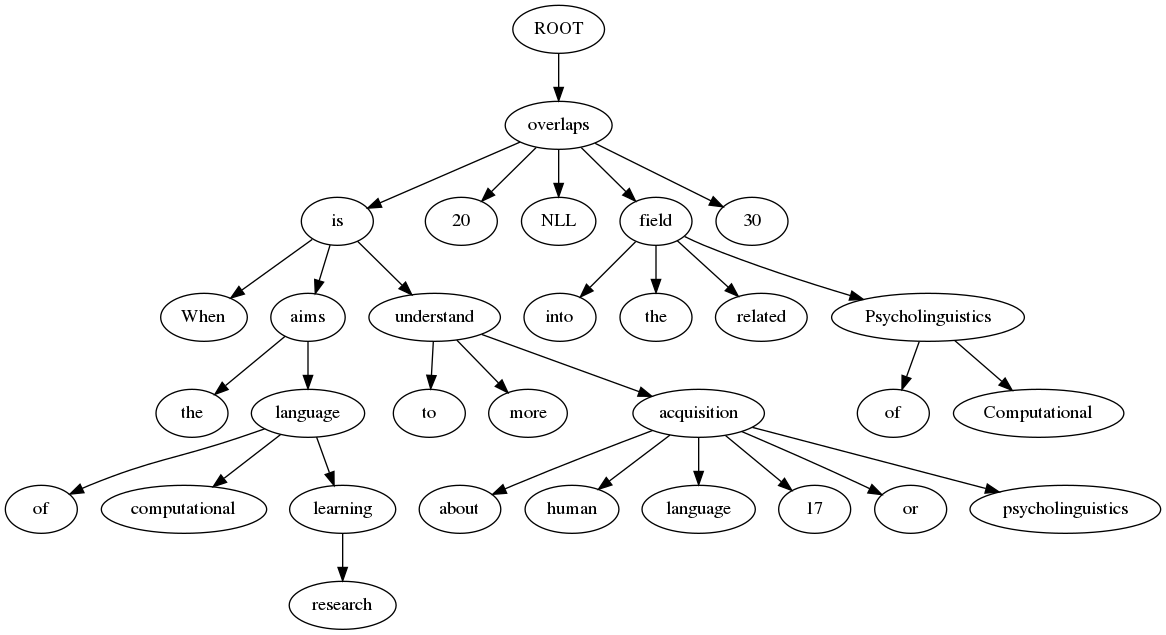

In [233]:
Image(g.create_png())

##### sandbox

In [168]:
%%bash
git commit -a -m'from notebook'

[master ed14064] from notebook
 2 files changed, 670 insertions(+), 206 deletions(-)


In [ ]:
run_dict = lchunk[i]
for x in run_dict:
    run_chunk = run_dict[x]
    g.add_node(pydot.Node(x , label = run_chunk.surface_short()))
    if run_chunk.dst != -1:    
        run_dst_chunk = run_dict[run_chunk.dst]     
        g.add_node(pydot.Node(run_chunk.dst , label = run_dst_chunk.surface_short()))
        g.add_edge(pydot.Edge(x , run_chunk.dst))
        is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
        is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
        if is_contain_noun and is_contain_verb:
            print("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))

In [111]:
word_list = [x.get_text() for  x in sentence.find_all('word')]

In [121]:
word_dict = dict()
for t in sentence.find_all('token'):
    idx = t.attrs.get('id')
    word = t.find("word").get_text()
    word_dict[idx] = word
    

In [123]:
word_dict

{'1': 'Natural',
 '10': 'Natural',
 '11': 'language',
 '12': 'processing',
 '13': '-LRB-',
 '14': 'NLP',
 '15': '-RRB-',
 '16': 'is',
 '17': 'a',
 '18': 'field',
 '19': 'of',
 '2': 'language',
 '20': 'computer',
 '21': 'science',
 '22': ',',
 '23': 'artificial',
 '24': 'intelligence',
 '25': ',',
 '26': 'and',
 '27': 'linguistics',
 '28': 'concerned',
 '29': 'with',
 '3': 'processing',
 '30': 'the',
 '31': 'interactions',
 '32': 'between',
 '33': 'computers',
 '34': 'and',
 '35': 'human',
 '36': '-LRB-',
 '37': 'natural',
 '38': '-RRB-',
 '39': 'languages',
 '4': 'From',
 '40': '.',
 '5': 'Wikipedia',
 '6': ',',
 '7': 'the',
 '8': 'free',
 '9': 'encyclopedia'}

In [ ]:
deps = soup.find('dependencies' , attrs = {'type':'collapsed-dependencies'})

In [69]:
deps = soup.find('dependencies' , attrs = {'type':'collapsed-dependencies'})

In [73]:
print(deps.prettify())

<dependencies type="collapsed-dependencies">
 <dep type="root">
  <governor idx="0">
   ROOT
  </governor>
  <dependent idx="18">
   field
  </dependent>
 </dep>
 <dep type="amod">
  <governor idx="3">
   processing
  </governor>
  <dependent idx="1">
   Natural
  </dependent>
 </dep>
 <dep type="compound">
  <governor idx="3">
   processing
  </governor>
  <dependent idx="2">
   language
  </dependent>
 </dep>
 <dep type="nmod:from">
  <governor idx="18">
   field
  </governor>
  <dependent idx="3">
   processing
  </dependent>
 </dep>
 <dep type="case">
  <governor idx="3">
   processing
  </governor>
  <dependent idx="4">
   From
  </dependent>
 </dep>
 <dep type="dep">
  <governor idx="3">
   processing
  </governor>
  <dependent idx="5">
   Wikipedia
  </dependent>
 </dep>
 <dep type="punct">
  <governor idx="18">
   field
  </governor>
  <dependent idx="6">
   ,
  </dependent>
 </dep>
 <dep type="det">
  <governor idx="12">
   processing
  </governor>
  <dependent idx="7">
   the

In [ ]:
for dep in deps.find_all()

In [78]:
i = 5

run_dict = lchunk[i]
for x in run_dict:
    run_chunk = run_dict[x]
    g.add_node(pydot.Node(x , label = run_chunk.surface_short()))
    if run_chunk.dst != -1:    
        run_dst_chunk = run_dict[run_chunk.dst]     
        g.add_node(pydot.Node(run_chunk.dst , label = run_dst_chunk.surface_short()))
        g.add_edge(pydot.Edge(x , run_chunk.dst))
        is_contain_noun = any([m.pos == "名詞" for m in run_chunk.morphs])
        is_contain_verb = any([m.pos == "動詞" for m in run_dst_chunk.morphs])
        if is_contain_noun and is_contain_verb:
            print("{}\t{}".format(run_chunk.surface_short() , run_dst_chunk.surface_short()))

NameError: name 'lchunk' is not defined

In [79]:
Image(g.create_png())

#### タプルの抽出

Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．

ただし，主語，述語，目的語の定義は以下を参考にせよ．

- 述語: nsubj関係とdobj関係の子（dependant）を持つ単語
- 主語: 述語からnsubj関係にある子（dependent）
- 目的語: 述語からdobj関係にある子（dependent）

In [59]:
   deps = sentence.find_all('dependencies' , attrs = {'type':'collapsed-dependencies'})
 

In [62]:
len(deps)

0

##### all

In [64]:
for sentence in soup.find_all('sentence'):
    depss = sentence.find_all('dependencies' , attrs = {'type':'collapsed-dependencies'})
    if len(depss)> 0:
        deps = depss[0]
        word_dict = dict()
        vs_dict = dict()
        vo_dict = dict()

        for d in deps.find_all('dep'):
            run_type = d.attrs.get('type')
            #print(run_type)
            if run_type in ['nsubj',  'dobj']:
                #print(run_type)
                #v = d
                gov = d.find('governor')
                vidx = gov.attrs.get("idx")
                vtext = gov.get_text()
                word_dict[vidx] = vtext
            if run_type == 'nsubj':
                sidx = d.find('dependent').attrs.get("idx")
                stext = d.find('dependent').get_text()
                word_dict[sidx] = stext
                vs_dict[vidx] = sidx
            if run_type == 'dobj':
                oidx = d.find('dependent').attrs.get("idx")
                otext= d.find('dependent').get_text()
                word_dict[oidx] = otext
                vo_dict[vidx] = oidx

        for x in vs_dict:
            y = vo_dict.get(x)
            if y is not None:
                vidx = x
                oidx = y
                sidx = vs_dict[x]
                s = word_dict[sidx]
                v = word_dict[vidx]
                o = word_dict[oidx]
                print("{}\t{}\t{}".format(s , v, o))

understanding	enabling	computers
others	involve	generation
Turing	published	article
experiment	involved	translation
ELIZA	provided	interaction
patient	exceeded	base
ELIZA	provide	response
which	structured	information
that	underlies	approach
underpinnings	discouraged	sort
Some	produced	systems
which	make	decisions
systems	rely	which
that	contains	errors
implementations	involved	coding
algorithms	take	set
Some	produced	systems
which	make	decisions
models	have	advantage
they	express	certainty
Systems	have	advantages
Automatic	make	use
that	make	decisions


##### one sentence

In [209]:
sentences= soup.find_all('sentence')
sentence_idx = 5
sentence = sentences[sentence_idx]

In [210]:
deps = sentence.find('dependencies' , attrs = {'type':'collapsed-dependencies'})

In [186]:
print(deps.prettify())

<dependencies type="collapsed-dependencies">
 <dep type="root">
  <governor idx="0">
   ROOT
  </governor>
  <dependent idx="5">
   involve
  </dependent>
 </dep>
 <dep type="amod">
  <governor idx="2">
   challenges
  </governor>
  <dependent idx="1">
   Many
  </dependent>
 </dep>
 <dep type="nsubj">
  <governor idx="5">
   involve
  </governor>
  <dependent idx="2">
   challenges
  </dependent>
 </dep>
 <dep type="case">
  <governor idx="4">
   NLP
  </governor>
  <dependent idx="3">
   in
  </dependent>
 </dep>
 <dep type="nmod:in">
  <governor idx="2">
   challenges
  </governor>
  <dependent idx="4">
   NLP
  </dependent>
 </dep>
 <dep type="amod">
  <governor idx="8">
   understanding
  </governor>
  <dependent idx="6">
   natural
  </dependent>
 </dep>
 <dep type="compound">
  <governor idx="8">
   understanding
  </governor>
  <dependent idx="7">
   language
  </dependent>
 </dep>
 <dep type="nsubj">
  <governor idx="13">
   enabling
  </governor>
  <dependent idx="8">
   unde

In [241]:
word_dict = dict()
vs_dict = dict()
vo_dict = dict()

for d in deps.find_all('dep'):
    run_type = d.attrs.get('type')
    #print(run_type)
    if run_type in ['nsubj',  'dobj']:
        print(run_type)
        #v = d
        gov = d.find('governor')
        vidx = gov.attrs.get("idx")
        vtext = gov.get_text()
        word_dict[vidx] = vtext
    if run_type == 'nsubj':
        sidx = d.find('dependent').attrs.get("idx")
        stext = d.find('dependent').get_text()
        word_dict[sidx] = stext
        vs_dict[vidx] = sidx
    if run_type == 'dobj':
        oidx = d.find('dependent').attrs.get("idx")
        otext= d.find('dependent').get_text()
        word_dict[oidx] = otext
        vo_dict[vidx] = oidx
    
        #tmp = d
        #print(type)

nsubj
dobj


In [242]:
for x in vs_dict:
    y = vo_dict.get(x)
    if y is not None:
        vidx = x
        oidx = y
        sidx = vs_dict[x]
        s = word_dict[sidx]
        v = word_dict[vidx]
        o = word_dict[oidx]
        print("{}\t{}\t{}".format(s , v, o))

experiment	involved	translation


##### sandbox

In [252]:
%%bash
git commit -a -m'from notebook'

[master e60df25] from notebook
 1 file changed, 14 insertions(+), 46 deletions(-)


#### S式の解析

Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．

入れ子になっている名詞句もすべて表示すること．

もっともわかりやすかった説明：
http://culture.cc.hirosaki-u.ac.jp/english/utsumi/linguistics/lingusitics_c11_ja.html

https://ja.wikipedia.org/wiki/%E5%8F%A5%E6%A7%8B%E9%80%A0%E8%A6%8F%E5%89%87

https://stanfordnlp.github.io/CoreNLP/parse.html

In [291]:
import re

正規表現again : 
http://uxmilk.jp/41416

- ?付きは最短マッチ
- ？をつけないと最長マッチなので適切にやれば正規表現でS式の構文解析が可能

In [206]:
def parse_extract(chunk , NPlist ,typelist):
    #r = re.compile(r'^\((.*?)\s(.*)\)(.*)$')
    #print(chunk)
    r = re.compile(r'^([^\(]*)\((.*?)\s(.*)\)')
    m = r.match(chunk)
    head = m.group(1)
    typ = m.group(2)
    content  = m.group(3)
    #resid = m.group(3)
    raw = ""
    lprocessed = []
    head = head.replace(" ", "")
    if len(head) > 0:
        lprocessed.append(head)
    depth = 0
    for c in content:
        if c == "(":
            #if depth == 0 & len(raw) != 0:
            #    lprocessed.append(raw)
            depth += 1
            raw += c
        elif c == ")":
            depth -= 1
            raw += c
            if depth == 0:
                #pass
                #print(type(ltext))
                #print(raw)
                inner_processed = parse_extract(raw , NPlist , typelist)
                #print(inner_processed)
                lprocessed.append(inner_processed)
                raw = ""
                
            pass
        else:
            raw += c
    
    lprocessed.append(raw)
    processed = " ".join(lprocessed)
    
    NPlist.append(processed)
    typelist.append(typ)
    return(processed)
            
    

##### １文章での例

In [210]:
sentences= soup.find_all('sentence')
sentence_idx = 5
sentence = sentences[sentence_idx]

In [211]:
run_parse = sentence.find('parse')

In [212]:
print(run_parse.prettify())

<parse>
 (ROOT (S (NP (NP (DT The) (NNP Georgetown) (NN experiment)) (PP (IN in) (NP (CD 1954)))) (VP (VBN involved) (NP (NP (ADJP (RB fully) (JJ automatic)) (NN translation)) (PP (IN of) (NP (QP (JJR more) (IN than) (CD sixty)) (JJ Russian) (NNS sentences)))) (PP (IN into) (NP (NNP English)))) (. .)))
</parse>



In [213]:
run_formula = run_parse.get_text()

In [207]:
NPlist = []
typelist = []
parse_extract(run_formula, NPlist , typelist)

'The Georgetown experiment  in 1954    involved fully automatic  translation  of more than sixty  Russian sentences    into English    .  '

##### 全体

In [228]:
NPlist = []
typelist = []
for sentence in soup.find_all('sentence'):
    run_parse = sentence.find('parse')
    if run_parse is not None:
        run_formula = run_parse.get_text()
        parse_extract(run_formula, NPlist , typelist)
    

In [227]:
type(run_parse)

NoneType

##### 結果の確認

In [229]:
for i , t in enumerate(typelist):
    if t == "NP":
        print(NPlist[i])
    

Natural language processing 
Wikipedia 
the free encyclopedia Natural language processing 
NLP 
the free encyclopedia Natural language processing  -LRB- NLP  -RRB-  
a field 
computer science 
a field  of computer science   
artificial intelligence 
linguistics 
the interactions 
computers 
human -LRB- natural -RRB- languages 
computers  and human -LRB- natural -RRB- languages  
the interactions  between computers  and human -LRB- natural -RRB- languages    
linguistics  concerned with the interactions  between computers  and human -LRB- natural -RRB- languages       
a field  of computer science    , artificial intelligence  , and linguistics  concerned with the interactions  between computers  and human -LRB- natural -RRB- languages        
such 
NLP 
the area 
humani-computer interaction 
the area  of humani-computer interaction   
Many challenges 
NLP 
Many challenges  in NLP   
natural language understanding 
natural language understanding  , that  is    , 
computers 
meaning 
hum

##### NP以外もついでに表示

In [208]:
for i in range(len(typelist)):
    print("[{}]{}".format(typelist[i] , NPlist[i]))

[DT]The
[NNP]Georgetown
[NN]experiment
[NP]The Georgetown experiment 
[IN]in
[CD]1954
[NP]1954 
[PP]in 1954  
[NP]The Georgetown experiment  in 1954   
[VBN]involved
[RB]fully
[JJ]automatic
[ADJP]fully automatic 
[NN]translation
[NP]fully automatic  translation 
[IN]of
[JJR]more
[IN]than
[CD]sixty
[QP]more than sixty 
[JJ]Russian
[NNS]sentences
[NP]more than sixty  Russian sentences 
[PP]of more than sixty  Russian sentences  
[NP]fully automatic  translation  of more than sixty  Russian sentences   
[IN]into
[NNP]English
[NP]English 
[PP]into English  
[VP]involved fully automatic  translation  of more than sixty  Russian sentences    into English   
[.].
[S]The Georgetown experiment  in 1954    involved fully automatic  translation  of more than sixty  Russian sentences    into English    . 
[ROOT]The Georgetown experiment  in 1954    involved fully automatic  translation  of more than sixty  Russian sentences    into English    .  


##### sandbox

In [178]:
    r = re.compile(r'^([^\(]*)\((.*?)\s(.*)\)')
    m = r.match(" (NNP Georgetown)")

In [203]:
len(typelist)

33

In [71]:
for x in re.finditer(r'\((.*?)\s(.*)\)' , "(NP very (NP very expensive))"):
    print("{}\t{}".format(x.group(1) ,  x.group(2)))

NP	very (NP very expensive)


In [311]:
for x in re.finditer(r'\(NP(.*)\)' , "(NP very (NP very expensive))"):
    print(x.group(1))

 very (NP very expensive)


In [289]:
re.search("\((.*?)\s(.*)\)", run_formula)

<_sre.SRE_Match object; span=(9, 294), match='(NP (NP (DT The) (NNP Georgetown) (NN experiment)>

In [281]:
tmp = re.search(r"NP\s(.*)\)" , run_formula)

In [226]:
type(tmp)


NameError: name 'tmp' is not defined

In [259]:
for c in run_formula:
    depth = 0
    if c == "(":
        depth += 1
    if 
    if c == ")":
        depth -= 1
        

(
R
O
O
T
 
(
S
 
(
N
P
 
(
N
P
 
(
D
T
 
T
h
e
)
 
(
N
N
P
 
G
e
o
r
g
e
t
o
w
n
)
 
(
N
N
 
e
x
p
e
r
i
m
e
n
t
)
)
 
(
P
P
 
(
I
N
 
i
n
)
 
(
N
P
 
(
C
D
 
1
9
5
4
)
)
)
)
 
(
V
P
 
(
V
B
N
 
i
n
v
o
l
v
e
d
)
 
(
N
P
 
(
N
P
 
(
A
D
J
P
 
(
R
B
 
f
u
l
l
y
)
 
(
J
J
 
a
u
t
o
m
a
t
i
c
)
)
 
(
N
N
 
t
r
a
n
s
l
a
t
i
o
n
)
)
 
(
P
P
 
(
I
N
 
o
f
)
 
(
N
P
 
(
Q
P
 
(
J
J
R
 
m
o
r
e
)
 
(
I
N
 
t
h
a
n
)
 
(
C
D
 
s
i
x
t
y
)
)
 
(
J
J
 
R
u
s
s
i
a
n
)
 
(
N
N
S
 
s
e
n
t
e
n
c
e
s
)
)
)
)
 
(
P
P
 
(
I
N
 
i
n
t
o
)
 
(
N
P
 
(
N
N
P
 
E
n
g
l
i
s
h
)
)
)
)
 
(
.
 
.
)
)
)
 


In [231]:
%%bash
git commit -a -m "finished 59"

[master 9311b3d] finished 59
 2 files changed, 120 insertions(+), 12 deletions(-)
 create mode 100644 nlp100_60.ipynb


In [225]:
del type